# Malaria Project

## Introduction 
### Members
#### Student 1
Name: Sebastian Schwarz
<br>Group : intermediate
#### Student 2
Name : Youssef Hantous
<br>Group : intermediate


### Data name :
**A geo-coded inventory of anophelines in the Afrotropical Region south of the Sahara: 1898-2016**

### Data URL : 
- Kaggle: https://www.kaggle.com/jboysen/malaria-mosquito 
- Dataverse: https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/NQ6CUN
<br>The paper describing how this dataset was compiled can be found here: https://wellcomeopenresearch.org/articles/2-57/v1 

##### Project Description
The aim of this project is to study the distribution and evolution of anophenile vectors of Malaria in Africa. 
The dataset is a compilation of all available Subsaharian mosquito studies from 1898 to 2016. It was compiled in *Kyalo D, Amratia P, Mundia CW et al. A geo-coded inventory of anophelines in the Afrotropical Region south of the Sahara: 1898-2016*, published in 2017 with the help of the KEMRI-Wellcome Trust, and in collaboration with many major research agencies on Malaria. 

This data should help better understand how malaria developped in the past century and what species are primarily associated with its expansion. 

We want to present this data in a clear fashion, showing trends in the evolution and the spread of anopheniles in Africa, and try to predict the future repartition of main malaria transmitting species. 

##### Github Repository
- https://github.com/SebastianS09/Malaria (peut être pas) 

*Please note: internet connection is required for proper execution. Interactive Plotly graphs will not be displayed correctly in Safari, latest version (5.2) of Jupyter Notebook is required (http://jupyter-notebook.readthedocs.io/en/stable/changelog.html) *

## Code
#### Data Import auditing and cleaning

In [8]:
import numpy as np 
import pandas as pd 

## The data was uploded on github to easily download it from any python session. 
data_raw = pd.read_csv("https://raw.githubusercontent.com/SebastianS09/Malaria/master/Data/Malaria.csv")

print("The dataset has ",data_raw.shape[0],"rows and ",data_raw.shape[1],"columns")

data_raw.head(10)


The dataset has  13464 rows and  41 columns


Country GAUL_Admin1    GAUL_Admin2       Full_Name     Lat     Long  \
0  Angola       Bengo          Dande  Barra do Dande -8.4730  13.3620   
1  Angola       Bengo          Dande       Boa Vista -8.5990  13.5660   
2  Angola       Bengo          Dande         Cabungo -8.5667  13.5000   
3  Angola       Bengo          Dande          Lifune -8.4000  13.4490   
4  Angola       Bengo         Dembos          Dembos -8.5156  14.5189   
5  Angola       Bengo  Icolo E Bengo       Bom Jesus -9.1660  13.5660   
6  Angola       Bengo  Icolo E Bengo   Icolo e Bengo -9.2500  13.7333   
7  Angola       Bengo  Icolo E Bengo         Kilunda -8.9268  13.5878   
8  Angola       Bengo  Icolo E Bengo     Lagoa Banda -8.8503  13.5842   
9  Angola       Bengo  Icolo E Bengo          Mazozo -9.1020  13.6220   

  LatLong_Source  YeStart  YeEnd An gambiae_complex  \
0        Encarta     1967   1967                  Y   
1        Encarta     1987   1987                  Y   
2          Other     2002   2002                  Y   
3        Encarta     1970   1970                NaN   
4   Google Earth     1940   1940                  Y   
5        Encarta     1952   1955                NaN   
6          Other     1940   1940                  Y   
7          Other     2001   2002                NaN   
8   Google Earth     1965   1965                  Y   
9        Encarta     1970   1970                  Y   

                         ...                         An rufipes  \
0                        ...                                NaN   
1                        ...                                NaN   
2                        ...                                NaN   
3                        ...                                NaN   
4                        ...                                NaN   
5                        ...                                NaN   
6                        ...                                NaN   
7                        ...                                NaN   
8                        ...                                NaN   
9                        ...                                NaN   

  An coustani s.l An ziemanni  An paludis    Adults/Larvae   Sampling_Methods  \
0             NaN          NaN         NaN  Adults, Larvae       HLC, HBC, LC   
1             NaN          NaN         NaN  Adults, Larvae            PSC, LC   
2             NaN          NaN         NaN          Adults   IR, Bednet traps   
3               Y            Y         NaN  Adults, Larvae       HLC, ABC, LC   
4             NaN          NaN         NaN         Unknown            Unknown   
5               Y            Y         NaN          Adults            IR, HLC   
6             NaN          NaN         NaN         Unknown            Unknown   
7             NaN          NaN         NaN          Adults                 IR   
8               Y            Y         NaN  Adults, Larvae  HLC, HBC, ABC, LC   
9             NaN          NaN         NaN  Adults, Larvae       HLC, ABC, LC   

  Species_Identification Other sib species names Other Anopheline species  \
0                      M                     NaN                      NaN   
1                      M                     NaN                      NaN   
2                 M, PCR                     NaN                      NaN   
3                      M                     NaN                      NaN   
4                      M                     NaN                      NaN   
5                      M                     NaN                      NaN   
6                      M                     NaN                      NaN   
7                 M, CBS                     NaN                      NaN   
8                      M                     NaN                      NaN   
9                      M                     NaN                      NaN   

                                        Source_Title  
0  Ribeiro H & Ramos HC (1975). Research on the m...  
1  R

One observation of the data set is associated with one location, time and a source study. I consists of saying wehter a species / subspecies of mosquito was detected during a particular survey or not.

The **location information** is displayed as follows: 
- Country and Village name
- GAUL administrative regions (https://en.wikipedia.org/wiki/Global_Administrative_Unit_Layers) which are a unified spatial admnistrative unit system
- Geospatial coordinates and source

The **historical information** is displayed as follows: 
- Each survey has a start and an end date. We will audit this in the next cell

There is **supplementary information** (meta-data on the study) on the survey namely:
- Adults/Larvae: whether the survey was conducts on adults or larvae (live in water), sometimes unknown
- Sampling methods: how the speciemens where caught 
- Identification methods: how they were attributed to one species
- Other names and other species: if the species found also have other names and if they were other species present than the main 36 quoted
Details of the abreviations can be found here: https://github.com/SebastianS09/Malaria/blob/master/Data/Africa%20Vectors%20database_1898-2016_key.pdf

Finally, there is the **source study** from which the information was taken.

We will explore this supplementary information later

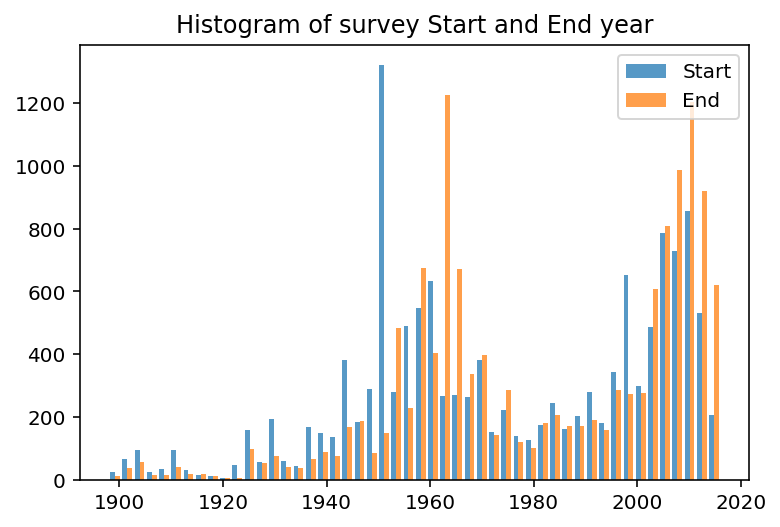

In [3]:
import matplotlib.pyplot as plt
#increasing size of graphs
plt.rcParams['figure.dpi'] = 72*2

dates = np.vstack([data_raw["YeStart"],data_raw["YeEnd"]]).T
plt.hist(dates,bins=50, alpha=0.75, label=['Start', 'End'])
plt.legend(loc='upper right')
plt.title("Histogram of survey Start and End year")
plt.show()

As we can see, most of the surveys have been executed around the 60s and in the late 2000s. 

However, the start year and the end year do not always coincide, meaning that the surveys may have been run on periods extending one year. Let us look into this with more detail. 

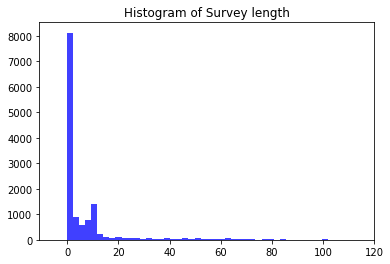

In [4]:
length = dates[:,1]-dates[:,0]
plt.hist(length, bins=50, facecolor="blue", alpha=0.75)
plt.title("Histogram of Survey length")
plt.show()

Most of the surveys have lasted for less than five years which seems reasonable. 
The fact that there is a non zero number of surveys lasting more than 20 years however is surprising. 
Let us look at this data and query the unique study titles associated to these long period surveys

In [5]:
long_survey = data_raw[["YeStart","YeEnd","Source_Title"]].query("YeEnd-YeStart>20")
pd.DataFrame(long_survey)

YeStart  YeEnd                                       Source_Title
22        1963   2006  Ribeiro H, Casaca VMR, Cochofel JALP (1964). A...
30        1952   2005  Gandara AF (1956). Subsido para o estude dos '...
60        1940   2003  De Mesquita B (1942). Considerações sobre o im...
117       1940   2014  De Mesquita B (1942). Considerações sobre o im...
126       1940   2014  De Mesquita B (1942). Considerações sobre o im...
154       1967   2001  Ribeiro H & Ramos HC (1975). Research on the m...
164       1912   2003  Sant'Anna JF (1920). Anofelíneos de Portugal e...
181       1983   2006  Ceita JGV (1988). Relatorio de missao sobre a ...
199       1970   2002  Ribeiro H & Ramos HC (1975). Research on the m...
208       1970   2003  Ribeiro H & Ramos HC (1975). Research on the m...
229       1967   2002  Ribeiro H & Ramos HC (1975). Research on the m...
253       1940   1969  De Mesquita B (1942). Considerações sobre o im...
268       1953   2014  Hamon J, Rickenbach A, Robert  P (1956). Secon...
271       1953   2013  Hamon J, Rickenbach A, Robert  P (1956). Secon...
283       1950   2015  Hamon J, Adam JP, Grjebine A (1956). Observati...
288       1953   2015  Hamon J, Rickenbach A, Robert  P (1956). Secon...
301       1953   2013  Hamon J, Rickenbach A, Robert  P (1956). Secon...
317       1953   2013  Hamon J, Rickenbach A, Robert  P (1956). Secon...
318       1953   2012  Hamon J, Rickenbach A, Robert  P (1956). Secon...
332       1953   2012  Hamon J, Rickenbach A, Robert  P (1956). Secon...
339       1953   2015  Hamon J, Rickenbach A, Robert  P (1956). Secon...
348       1953   2008  Hamon J, Rickenbach A, Robert  P (1956). Secon...
353       1970   2009  Ross Institute of Tropical Hygiene (1975). Mos...
358       1968   2009  Coz J (1973). Contribution a l’etude du comple...
373       1905   2009  Le Moal (1906). Étude sur les Moustiques en Af...
380       1953   2015  Hamon J, Rickenbach A, Robert  P (1956). Secon...
382       1968   2006  Coz J (1973). Contribution a l’etude du comple...
405       1950   2007  Hamon J, Adam JP, Grjebine A (1956). Observati...
415       1986   2015  Pombi M, Caputo B, Simard F, Di Deco MA, Coluz...
422       1950   2006  Hamon J, Adam JP, Grjebine A (1956). Observati...
...        ...    ...                                                ...
13175     1975   1999  Bransby-Williams WR (1979). House catches of a...
13187     1945   2014  Government of Northern Rhodesia (1946). Health...
13209     1944   1999  Muspratt J (1946). On Coelomomyces fungi causi...
13220     1941   1999  Muspratt J (1946). On Coelomomyces fungi causi...
13244     1964   1990  Odetoyinbo JA & Davidson G (1968). The Anophel...
13248     1958   2010  Iyengar R (1962). The bionomics of salt-water ...
13253     1913   2013  Aders WM (1917). Insects injurious to man and ...
13256     1958   1990  Delfini LF (1968). Malaria Eradication Program...
13272     1923   1968  Mansfield-Aders W (1927). Notes on malaria and...
13291     1924   2013  Mansfield-Aders W (1927). Notes on malaria and...
13303     1913   2002  Mansfield-Aders W (1920). Notes on the Identif...
13317     1924   2008  Mansfield-Aders W (1927). Notes on malaria and...
13325     1923   2013  Mansfield-Aders W (1927). Notes on malaria and...
13334     1926   1956  Leeson HS (1931). Anopheline Mosquitos in Sout...
13337     1901   2002  Kumm HW (1929). The geographical distribution ...
13350     1973   2014  Coetzee M, Hunt RH, Braak LEO, Davidson G (199...
13352     1926   2014  Leeson HS (1931). Anopheline Mosquitos in Sout...
13354     1934   1956  Evans AM & Lesson HS (1935). The funestus seri...
13361     1926   2002  Leeson HS (1931). Anopheline Mosquitos in Sout...
13368     1974   2002  Mahon RJ, Green CA, Hunt RH (1976). Diagnostic...
13375     1926   1956  Leeson HS (1931). Anopheline Mosquitos in Sout...
13398     1962   2002  Davidson G (1966). Distribution Records of Mem...
13405     1926   2014  Leeson HS (1931). Anopheline Mosquitos in 

In [6]:
pd.DataFrame(long_survey["Source_Title"].value_counts().sort_values(ascending = False))

Source_Title
Sogoba N, Vounatsou P, Bagayoko MM, Doumbia S, ...            22
Lewis DJ (1945). Observations on the distributi...            14
Lewis DJ (1956). The anopheline mosquitoes of S...            10
Lewis DJ (1945). Observations on the distributi...             6
Laveran MA (1904). Anopheles et paludisme a Mad...             4
de Meillon B (1941). Estudos entomológicos da c...             4
Mourão MC (1964). Relatório da Missão de estudo...             4
Choumara R (1961). Notes on Malaria in Somalila...             3
Maffi M (1960). Malaria in the Regions of Mudug...             3
Mourão MC (1964). Relatório da Missão de estudo...             3
Rahm U & Vermylen M (1966). Répertoire et répar...             3
Galliard H (1932). Culicides du Gabon. III. - A...             3
Hamon J, Abonnenc E, Noel E (1955). Contributio...             3
Lewis DJ (1956). The anopheline mosquitoes of S...             3
Grjebine A (1966). Faune de Madagascar XXII. In...             3
DVBD (1981). Progress of the new DVBD Station K...             2
Corradetti A (1940). Le conoscenze sulla distri...             2
Ingram A (1919). The domestic breeding mosquito...             2
Service MW (1963). Checklist and distribution o...             2
Choumara R (1958). WHO Malaria survey and Centr...             2
Schwetz J (1930). Note préliminaire sur les mou...             2
Grjebine A (1966). Faune de Madagascar XXII. In...             2
Rahm U & Vermylen M (1966). Répertoire et répar...             2
Coz J (1973). Contribution a l’etude du complex...             2
Schwetz J (1941).  Contribution á l'etude des a...             2
Lewis DJ (1956). The anopheline mosquitoes of S...             2
Rodhain F, Boutonnier A, Carteron B, Morvan D (...             2
Lewis DJ (1956). The anopheline mosquitoes of S...             2
Chauvet (1969). Repartition et ecologie du comp...             2
Cambournac FJC, Vieira HSR, Coutinho MA, Soares...             2
...                                                          ...
Maffi M (1960). Malaria in the Regions of Mudug...             1
Johnson WB (1919). Domestic Mosquitos of the No...             1
Grjebine A (1966). Faune de Madagascar XXII. In...             1
Esposito F, Lombardi S, Toure YT, Zavala F, Col...             1
Mnzava AEP & Kilama WL (1986). Observations on ...             1
Mouchet J, Gariou J, Hamon J (1960). Note fauni...             1
Wijers DJB & Kiilu G (1977). Bancroftian Filari...             1
Clement LL (1980). Endemicity of Malaria in Jub...             1
Wilson DB (1947). Malaria in Madagascar. East A...             1
Van Someren ECC, Teesdale C, Furlong M (1955). ...             1
McIntosh BM, Harwin RM, Paterson HE, Westwater ...             1
Le Moal (1906). Étude sur les Moustiques en Afr...             1
De Meillon B (1933). On Anopheles funestus and ...             1
Sant'Anna JF (1920). Anofelíneos de Portugal e ...             1
Coz J (1973). Contribution a l’etude du complex...             1
Simpson JJ (1913). Entomological research in Br...             1
Programme National de Lutte contre le Paludisme...             1
Coz J (1973). Contribution a l’etude du complex...             1
Mouchet J (1970). Survey of Aedes Aegypti and o...             1
Evans AM (1935). Notes on anophelines I.- Descr...             1
Symes CB (1927). Notes on Anophelines and Malar...             1
Chauvet G, Dyemkouma A, Rivière F (collab), Bel...             1
Nsibu CN, Mumba DN, Mesia GK, Bobanga TL, Mania...             1
Toure YT (1982). Sensibilite d'anopheles funest...             1
Kumm HW (1929). The geographical distribution o...             1
Akogbéto M (1992). Étude des aspects épidémiolo...             1
de Meira MTV (1963). Relatório da missão perman...             1
Faye O, Fontenille D, Gaye O, Sy N, Molez JF, K...             1
Josse R, Josseran R, Audibert M, Merlin M, Comb...             1
Khromov A & Privault R (1965). Programme de Pre...             1

[1077 rows x 1 column

Looking at this summary data, it seems that republication dates have sometimes be taken into account as end dates (see Hamon J studies for example). 

**Moving forward, we will therefore use the start date as the reference date.** We would suggest auditing these long period cases for the sake of the datasets integrity, even if it does not affect us very much here.

Let us move forward and clean the data to only keep the columns we need in our anlaysis. 

##### Removing unecessary geographical precision and study information

The Study_source column is particularly heavy (the description texts are very long). We will remove it to speed up data manipulation processes and ligthen memory usage. 

We will also remove too granular geographical information (Gaul_Admin2 and Full_name which is the name of the village)

We also remove spaces, dots and slashes from the column names to avoid errors when manipulating data. 

In [10]:
print(data_raw.memory_usage(deep=True))

#harmonizing column names to avoid errors
data_raw.columns = [i.replace(' ', '_') for i in data_raw.columns]
data_raw.columns = [i.replace('.', '_') for i in data_raw.columns]
data_raw.columns = [i.replace('/', '_') for i in data_raw.columns]
col_rm = ['GAUL_Admin2','Full_Name','LatLong_Source','Source_Title']

#create a dataframe with dropped columns
data_rm = data_raw.drop(col_rm, axis=1)



Index                                          80
Country                                    897136
GAUL_Admin1                                876530
GAUL_Admin2                                871399
Full_Name                                  891652
Lat                                        107712
Long                                       107712
LatLong_Source                             873338
YeStart                                    107712
YeEnd                                      107712
An gambiae_complex                         825112
An gambiae ss                              566508
SS M Form (An colluzzi or Mopti forms)     476102
SS S Form (savanah or Bamako forms)        484398
An arabiensis                              554880
An. melas                                  449140
An. merus                                  439484
An bwambae                                 431732
An funestus  s.l                           604078
An funestus s.s. (specified)               455566


##### Cleaning Adults/Larvae field for Case

We notice that we have an occurence of Adults/larvae with a minuscule which we want to clean

In [20]:
print("Initial data: \n",data_raw["Adults_Larvae"].value_counts(),"\n")

data_raw["Adults_Larvae"] = data_raw["Adults_Larvae"].replace("Adults, larvae","Adults, Larvae")

print("Cleaned data: \n",data_raw["Adults_Larvae"].value_counts())

Initial data: 
 Adults, Larvae    5598
Adults            5009
Larvae            1826
Unknown           1031
Name: Adults_Larvae, dtype: int64 

Cleaned data: 
 Adults, Larvae    5598
Adults            5009
Larvae            1826
Unknown           1031
Name: Adults_Larvae, dtype: int64


##### Replacing Y and NaN with 0 and 1 for ease of understanding (col 7 to 33)
As we can see, the presence of an anophenile is encoded in columns holding the species' names, with "Yes" if it is present and "NaN" otherwise. 
We will replace these values to 0 and 1 to be able to perform mathematical operations on the columns

In [40]:
print("Column titles: \n",list(data_raw),"\n")

#making a copy of the data with dropped columns
data_clean = data_rm.copy()

#list of columns with mosquito information
ano = list(data_clean)[6:32]

print(data_clean[ano[:3]].head(2))

#Let us replace Y and NaN
data_clean[ano] = data_clean[ano].replace(['Y'],1)
data_clean[ano] = data_clean[ano].fillna(0)

#inspection
data_clean.head(10)

Column titles: 
 ['Country', 'GAUL_Admin1', 'GAUL_Admin2', 'Full_Name', 'Lat', 'Long', 'LatLong_Source', 'YeStart', 'YeEnd', 'An_gambiae_complex', 'An_gambiae_ss', 'SS_M_Form_(An_colluzzi_or_Mopti_forms)', 'SS_S_Form_(savanah_or_Bamako_forms)', 'An_arabiensis', 'An__melas', 'An__merus', 'An_bwambae', 'An_funestus__s_l', 'An_funestus_s_s__(specified)', 'An_rivulorum', 'An_leesoni', 'An_parensis', 'An_vaneedeni', 'An_nili_s_l', 'An_moucheti_s_l', 'An_pharoensis', 'An_hancocki', 'An_mascarensis', 'An_marshalli', 'An_squamous', 'An_wellcomei', 'An_rufipes', 'An_coustani_s_l', 'An_ziemanni_', 'An_paludis_', 'Adults_Larvae', 'Sampling_Methods', 'Species_Identification', 'Other_sib_species_names', 'Other_Anopheline_species', 'Source_Title'] 

  An_gambiae_complex An_gambiae_ss SS_M_Form_(An_colluzzi_or_Mopti_forms)
0                  Y           NaN                                    NaN
1                  Y           NaN                                    NaN


Country GAUL_Admin1     Lat     Long  YeStart  YeEnd  An_gambiae_complex  \
0  Angola       Bengo -8.4730  13.3620     1967   1967                 1.0   
1  Angola       Bengo -8.5990  13.5660     1987   1987                 1.0   
2  Angola       Bengo -8.5667  13.5000     2002   2002                 1.0   
3  Angola       Bengo -8.4000  13.4490     1970   1970                 0.0   
4  Angola       Bengo -8.5156  14.5189     1940   1940                 1.0   
5  Angola       Bengo -9.1660  13.5660     1952   1955                 0.0   
6  Angola       Bengo -9.2500  13.7333     1940   1940                 1.0   
7  Angola       Bengo -8.9268  13.5878     2001   2002                 0.0   
8  Angola       Bengo -8.8503  13.5842     1965   1965                 1.0   
9  Angola       Bengo -9.1020  13.6220     1970   1970                 1.0   

   An_gambiae_ss  SS_M_Form_(An_colluzzi_or_Mopti_forms)  \
0            0.0                                     0.0   
1            0.0                                     0.0   
2            1.0                                     0.0   
3            0.0                                     0.0   
4            0.0                                     0.0   
5            0.0                                     0.0   
6            0.0                                     0.0   
7            0.0                                     0.0   
8            0.0                                     0.0   
9            0.0                                     0.0   

   SS_S_Form_(savanah_or_Bamako_forms)            ...             \
0                                  0.0            ...              
1                                  0.0            ...              
2                                  1.0            ...              
3                                  0.0            ...              
4                                  0.0            ...              
5                                  0.0            ...              
6                                  0.0            ...              
7                                  0.0            ...              
8                                  0.0            ...              
9                                  0.0            ...              

   An_wellcomei  An_rufipes  An_coustani_s_l  An_ziemanni_  An_paludis_  \
0           0.0         0.0              0.0           0.0          0.0   
1           0.0         0.0              0.0           0.0          0.0   
2           0.0         0.0              0.0           0.0          0.0   
3           0.0         0.0              1.0           1.0          0.0   
4           0.0         0.0              0.0           0.0          0.0   
5           0.0         0.0              1.0           1.0          0.0   
6           0.0         0.0              0.0           0.0          0.0   
7           0.0         0.0              0.0           0.0          0.0   
8           0.0         0.0              1.0           1.0          0.0   
9           0.0         0.0              0.0           0.0          0.0   

    Adults_Larvae   Sampling_Methods  Species_Identification  \
0  Adults, Larvae       HLC, HBC, LC                       M   
1  Adults, Larvae            PSC, LC                       M   
2          Adults   IR, Bednet traps                  M, PCR   
3  Adults, Larvae       HLC, ABC, LC                       M   
4         Unknown            Unknown                       M   
5          Adults            IR, HLC                       M   
6         Unknown            Unknown                       M   
7          Adults                 IR                  M, CBS   
8  Adults, Larvae  HLC, HBC, ABC, LC                       M   
9  Adults, Larvae       HLC, ABC, LC                       M   

   Other_sib_species_names  Other_Anopheline_species  
0                      NaN                       NaN  
1                      NaN                       NaN  
2                      NaN           

In [36]:
#Print basic statistics on the new cleaned data set 

data_clean.describe(include="all")

Country GAUL_Admin1           Lat          Long       YeStart  \
count        13464       13364  13330.000000  13330.000000  13464.000000   
unique          48         543           NaN           NaN           NaN   
top     Madagascar      Nyanza           NaN           NaN           NaN   
freq          1274         407           NaN           NaN           NaN   
mean           NaN         NaN      1.180477     19.948668   1974.798500   
std            NaN         NaN     11.783243     20.642544     28.171339   
min            NaN         NaN    -34.299700    -25.107200   1898.000000   
25%            NaN         NaN     -5.644775      1.014475   1952.000000   
50%            NaN         NaN      4.774750     27.341300   1972.000000   
75%            NaN         NaN     10.657750     36.915450   2003.000000   
max            NaN         NaN     22.102500     51.200000   2016.000000   

               YeEnd  An_gambiae_complex  An_gambiae_ss  \
count   13464.000000        13464.000000   13464.000000   
unique           NaN                 NaN            NaN   
top              NaN                 NaN            NaN   
freq             NaN                 NaN            NaN   
mean     1982.053105            0.861260       0.296346   
std        26.196835            0.345688       0.456662   
min      1900.000000            0.000000       0.000000   
25%      1962.000000            1.000000       0.000000   
50%      1984.000000            1.000000       0.000000   
75%      2007.000000            1.000000       1.000000   
max      2016.000000            1.000000       1.000000   

        SS_M_Form_(An_colluzzi_or_Mopti_forms)  \
count                             13464.000000   
unique                                     NaN   
top                                        NaN   
freq                                       NaN   
mean                                  0.098856   
std                                   0.298480   
min                                   0.000000   
25%                                   0.000000   
50%                                   0.000000   
75%                                   0.000000   
max                                   1.000000   

        SS_S_Form_(savanah_or_Bamako_forms)            ...             \
count                          13464.000000            ...              
unique                                  NaN            ...              
top                                     NaN            ...              
freq                                    NaN            ...              
mean                               0.116979            ...              
std                                0.321407            ...              
min                                0.000000            ...              
25%                                0.000000            ...              
50%                                0.000000            ...              
75%                                0.000000            ...              
max                                1.000000            ...              

        An_wellcomei    An_rufipes  An_coustani_s_l  An_ziemanni_  \
count   13464.000000  13464.000000     13464.000000  13464.000000   
unique           NaN           NaN              NaN           NaN   
top              NaN           NaN              NaN           NaN   
freq             NaN           NaN              NaN           NaN   
mean        0.020202      0.074198         0.199941      0.049242   
std         0.140696      0.262102         0.399970      0.216382   
min         0.000000      0.000000         0.000000      0.000000   
25%         0.000000      0.000000         0.000000      0.000000   
50%         0.000000      0.000000         0.000000      0.000000   
75%         0.000000      0.000000         0.000000      0.000000   
max         1.000000      1.000000         1.000000      1.000000   

         An_paludis_   Adults_Larvae  Sampling_Methods  \
count   13464.000000    

##### Editing Other Species
We see that we have other species not mentionned in the column names in the last column. Let us check if they are relevant (in terms of frequency vs. species with dedicated columns):

In [41]:
#splitting the last column as the additional species are comma separated
other_f = data_clean['Other_Anopheline_species'].str.split(', ', expand=True)
other_f.fillna(0,inplace=True)

#counting the occurence in each new column
a = other_f[0].value_counts().to_frame()

print(a.head(10))

#removing the count of 0
for i in list(other_f.drop(0,axis=1)):
    a = a.join(other_f[i].value_counts().to_frame())
a.fillna(0,inplace=True)

#summing the columns up to have a definite count
pd.DataFrame(a.sum(axis=1).sort_values(ascending = False)[1:,])

                        0
0                   10346
An pretoriensis       309
An pauliani           231
An maculipalpis       201
An d'thali            186
An obscurus           178
An rhodesiensis       159
An quadriannulatus    129
An christyi           126
An cydippis           118


0
An pretoriensis                       535.0
An maculipalpis                       413.0
An d'thali                            315.0
An obscurus                           270.0
An rhodesiensis                       265.0
An pauliani                           255.0
An demeilloni                         203.0
An cydippis                           187.0
An christyi                           186.0
An flavicosta                         173.0
An quadriannulatus                    164.0
An implexus                           152.0
An hargreavesi                        133.0
An cinereus                           132.0
An longipalpis                        111.0
An cinctus                            101.0
An grassei                             97.0
An dureni                              96.0
An brohieri                            93.0
An listeri                             88.0
An tenebrosus                          82.0
An macmahoni                           81.0
An natalensis                          74.0
An milloti                             69.0
An turkhudi                            68.0
An garnhami                            65.0
An brunnipes                           64.0
An domicolus                           61.0
An freetownensis                       45.0
An theileri                            44.0
...                                     ...
An gabonensis                           2.0
An longipalpis type C                   1.0
An crypticus                            1.0
An tenebrousus                          1.0
An pretoriensi                          1.0
An preteriensis                         1.0
An pretoriesnsis                        1.0
An rhodesensis rhodesensis              1.0
An salbaii (now known as An. hervyi)    1.0
An cyddipis                             1.0
An rhodesiensis rupicalus               1.0
An chrysti                              1.0
An argenteobatus                        1.0
An longipalppsi                         1.0
An subpictus                            1.0
An maculipapis                          1.0
An theileri var. brohieri               1.0
An nigerrimus                           1.0
An cinerius                             1.0
An swahilicus                           1.0
An culicifacies var. adenensis          1.0
An junestus                             1.0
An rupicolus (first description)        1.0
An smithi var rageaui                   1.0
An pretorensis                          1.0
An protoriensis                         1.0
An rhodesensis                          1.0
An wilconi                              1.0
An lakani                               1.0
An cavernicolus                         1.0

[148 rows x 1 columns]

Let us compare this to the occurences of mosquitos that have dedicated column names

In [12]:
pd.DataFrame(data_clean[ano].sum(axis=0).sort_values(ascending = False))

0
An_gambiae_complex                      11596.0
An_funestus__s_l                         5095.0
An_gambiae_ss                            3990.0
An_arabiensis                            3648.0
An_coustani_s_l                          2692.0
An_pharoensis                            1902.0
SS_S_Form_(savanah_or_Bamako_forms)      1575.0
SS_M_Form_(An_colluzzi_or_Mopti_forms)   1331.0
An_squamous                              1294.0
An_rufipes                                999.0
An_nili_s_l                               823.0
An_funestus_s_s__(specified)              727.0
An_ziemanni_                              663.0
An__melas                                 538.0
An_moucheti_s_l                           502.0
An_mascarensis                            483.0
An_marshalli                              444.0
An_paludis_                               376.0
An_hancocki                               298.0
An_wellcomei                              272.0
An__merus                                 254.0
An_rivulorum                              245.0
An_leesoni                                188.0
An_parensis                                41.0
An_vaneedeni                               34.0
An_bwambae                                 26.0

As we can see, there are quite high occuring species in "Others". they would rank above An Mouscheti in the primary vector classification. 

However, and as stated in the abstract, the classification has not be done exclusively on occurence. According to the authors of the dataset, *"The definition of secondary vectors is complex and often site/time specific"* We refer to the paper for further information but the main point is that secondary vectors do not transmit paludism to humans, or in very rare cases. 

For the sake of the exercise and reflecting information of this databse of anopheniles: http://bioinfo-web.mpl.ird.fr/identiciels/anopheles/html/taxa/pretoriensis_A_.html, we will add  An Pretoriensis to the primary vectors as they have been transmitting fever generating arboviruses in Nigeria

In [13]:
An_pretoriensis = data_clean["Other_Anopheline_species"].str.contains("An pretoriensis").fillna(0)*1
data_clean.insert(32,"An_pretoriensis",An_pretoriensis)

#### MetaData analysis
Let us explore the metadata associated to the records which is:
- Adults/Larvae
- Sampling_Methods
- Species_Identification

We will start with some quick summarizing and plotting

##### Species type survey Attributes in time and Space

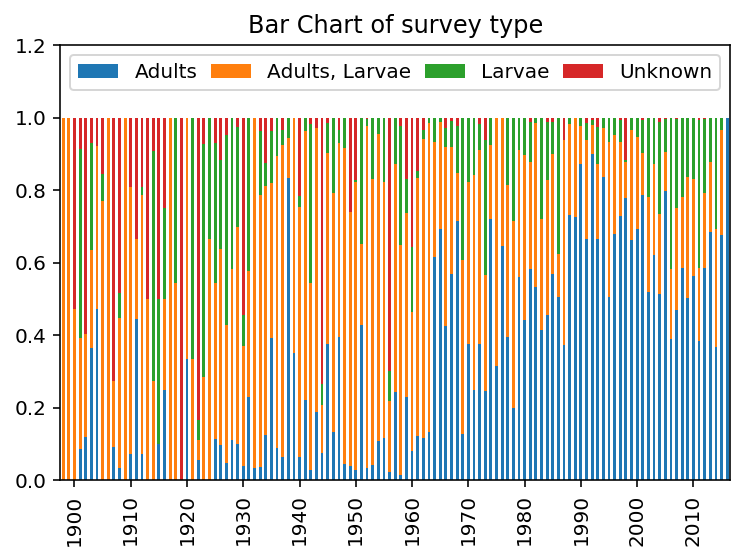

In [61]:
#plotting the distributionover time using a pivot table
AL = data_raw[["YeStart","Adults_Larvae"]]
AL_pivot = AL.reset_index().pivot_table(index = "YeStart", columns = "Adults_Larvae",aggfunc=lambda x: len(x.unique())).fillna(0)
AL_pivot.columns = AL_pivot.columns.droplevel()

x = AL_pivot.index.values
y = np.vstack(AL_pivot[i] for i in AL_pivot.columns)
y_norm = (y/y.sum(axis=0))
col_names = list(AL_pivot)

#plotting using pandas buil-in matplot lib implementation
AL_plot = pd.DataFrame(y_norm.T,columns=col_names)
AL_plot.index = x
AL_plot.plot.bar(stacked = True)

#defining additional parameters of the plot
ax = plt.gca() 
ax.set_xticks(range(2,120,10))
ax.set_xticklabels(range(1900,2020,10))

plt.legend(loc='upper left',ncol=4, mode="expand")
plt.title("Bar Chart of survey type")
plt.ylim(ymax = 1.2, ymin = 0)
plt.show()

It appears that over time, surveys focused in particular on Adults but also Larvae are prefered over mixed surveys. This makes sense as it must be easier to distinguish species and to make more accurate surveys. 
Also, Unknown surveys tend to diminish over time, due to better reporting

Let us check if there is a geographical influence:

In [60]:
#function to calculate breaks in a sorted dataframe, which we will use to create subsets to map 

def get_lim(df,col):
    if not isinstance(df, pd.DataFrame):
        raise ValueError("Input is not a pandas DataFrame")
    if not col in list(df):
        raise ValueError("Column name is not in the selected dataframe")
    val=df[col].unique()
    temp = []
    temp_s = [0]
    out = []
    for i in range(0,len(val)):
        temp.append(len(df[df[col]==val[i]]))
    for i in range(0,len(val)):
        temp_s.append(sum(temp[0:i+1]))
    for i in range(0,len(val)):
        out.append((temp_s[i],temp_s[i+1]))
    return(out)    

#function to generate colormaps
#source: https://stackoverflow.com/questions/876853/generating-color-ranges-in-python
import colorsys

def get_N_HexCol(N=5):
    HSV_tuples = [(x * 1.0 / N, 0.9, 0.9) for x in range(N)]
    hex_out = []
    for rgb in HSV_tuples:
        rgb = map(lambda x: int(x * 255), colorsys.hsv_to_rgb(*rgb))
        hex_out.append('#%02x%02x%02x' % tuple(rgb))
    return hex_out

We will use Plotly to generate nice interactive Maps. 

Map tools such as Basemap or folium offer either less quality in interaction with a Jupyter notebook or a not so friendly user experience.

Plotly is an open source collaborative tool for generating plots in different languages, with a quite transparent implementation. 

Documentation can be found here: https://plot.ly/python/

There is a hosted version which needs an account and an API key, but we will be using the offline tool (which explains the size of the notebook)

The concept is to define a dictionnary with data (defining the coordinates and the caracteristics of the points) and a dictionnary with a layout (defining the appearance of the map). Interactivity is built in, and other features such as sliders and buttons can be added (example beneath). 

In [63]:
import plotly as py
from plotly import tools

#needed to plot offline in the notebook
py.offline.init_notebook_mode(connected=True)

#selection of the Adults_larvae column and sorting.
#We will plot surveys since the 80s only to limit the size of the maps

AL_G = data_raw[data_raw["YeStart"]>1980][["Adults_Larvae","Lat","Long"]]
AL_G = AL_G.sort_values(["Adults_Larvae"])

#defining the limits and the color map
limits = get_lim(AL_G,"Adults_Larvae")
colors = get_N_HexCol(len(limits))
data = []
names=col_names

for i in range(len(limits)):
    lim = limits[i]
    df_sub = AL_G[lim[0]:lim[1]]
    data.append(dict(
        type = 'scattergeo',
        locationmode = 'africa',
        lon = df_sub['Long'],
        lat = df_sub['Lat'],
        marker = dict(
            color = colors[i],
            line = dict(width=0.5, color='rgb(40,40,40)'),
            sizemode = 'area'
        ),
        name=names[i])
               )

layout = dict(
        title = 'Survey anophenile subject type after 1980',
        showlegend = True,
        hovermode = False,
        geo = dict(
            scope='africa',
            projection=dict( type='africa' ),
            showland = True,
            landcolor = 'rgb(185, 185, 185)',
            subunitwidth=1,
            countrywidth=1,
            subunitcolor="rgb(200, 200, 200)",
            countrycolor="rgb(255, 255, 255)"
        ),
    )

fig = dict(data=data, layout=layout)
py.offline.iplot(fig)

From a Geographical perspective, there appears to be no particular preference of survey type since the eighties. 
However, very few surveys have been conducted in central Africa
Plotting before the sixties show that most Central Africa surveys have been conducted before the sixties, with an Unknown methodology concerning subjects. 

In [65]:
AL_G = data_raw[data_raw["YeStart"]<1960][["Adults_Larvae","Lat","Long"]]
AL_G = AL_G.sort_values(["Adults_Larvae"])

#defining the limits and the color map
limits = get_lim(AL_G,"Adults_Larvae")
colors = get_N_HexCol(len(limits))
data = []

for i in range(len(limits)):
    lim = limits[i]
    df_sub = AL_G[lim[0]:lim[1]]
    data.append(dict(
        type = 'scattergeo',
        locationmode = 'africa',
        lon = df_sub['Long'],
        lat = df_sub['Lat'],
        marker = dict(
            color = colors[i],
            line = dict(width=0.5, color='rgb(40,40,40)'),
            sizemode = 'area'
        ),
        name=names[i])
               )
layout = dict(
        title = 'Survey anophenile subject type before 1960',
        showlegend = True,
        hovermode = False,
        geo = dict(
            scope='africa',
            projection=dict( type='africa' ),
            showland = True,
            landcolor = 'rgb(185, 185, 185)',
            subunitwidth=1,
            countrywidth=1,
            subunitcolor="rgb(200, 200, 200)",
            countrycolor="rgb(255, 255, 255)"
        ),
    )

fig = dict(data=data, layout=layout)
py.offline.iplot(fig)   

##### Sampling Methods

Let us now analysis the sampling methods that have been used
We will first compute the top 10 sampling methods

Here the abreviations as a reminder:

<table class="tableizer-table">
<thead><tr class="tableizer-firstrow"><th>Abreviation</th><th>Description</th></tr></thead><tbody>
 <tr><td>ABC</td><td>Animal Bait Catches</td></tr>
 <tr><td>Bednet traps</td><td>Bed net traps</td></tr>
 <tr><td>CDC Light traps</td><td>CDC light traps</td></tr>
 <tr><td>HBC/NBC</td><td>Human/Night Bait Catches (may be witnin a double sided net)</td></tr>
 <tr><td>HLC</td><td>Human Landing Catches </td></tr>
 <tr><td>NBC</td><td>Night Bait Catches</td></tr>
 <tr><td>IR</td><td>Indoor resting (Often written as room searches, aspirators or hand catches indoors)</td></tr>
 <tr><td>OS</td><td>Outdoor sampling</td></tr>
 <tr><td>LC</td><td>Larval Collections</td></tr>
 <tr><td>Exit traps</td><td>Exit traps</td></tr>
 <tr><td>PSC </td><td>Pyrethrum Spray Catches</td></tr>
 <tr><td>ITT </td><td>Ifakara Tent Traps</td></tr>
</tbody></table>

         Count
LC        7243
IR        5289
PSC       4374
HBC       2497
Unknown   2056 



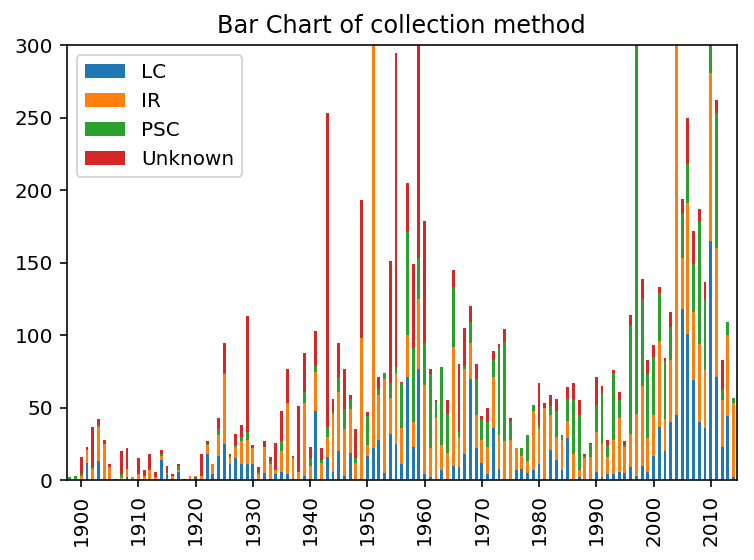

In [67]:
top_methods = pd.DataFrame(pd.Series(' '.join(data_clean['Sampling_Methods']+",").split(", ")).value_counts()[:10], columns = ["Count"])

#let us check the evolution of the top 3 sampling methods over time and of Unknown sampling method (fifth most frequent)

print(top_methods[0:5],"\n")

M0 = data_clean[data_clean['Sampling_Methods'].str.match(top_methods.index[0])]["YeStart"]
M1 = data_clean[data_clean['Sampling_Methods'].str.match(top_methods.index[1])]["YeStart"]
M2 = data_clean[data_clean['Sampling_Methods'].str.match(top_methods.index[2])]["YeStart"]
MU = data_clean[data_clean['Sampling_Methods'].str.match("Unknown")]["YeStart"]

#aggregate data 
M0v = M0.value_counts()
M1v = M1.value_counts()
M2v = M2.value_counts()
MUv = MU.value_counts()

conc = pd.concat([M0v,M1v,M2v,MUv],axis=1)
conc.columns=[top_methods.index[[0,1,2,4]]]
conc.plot.bar(stacked=True)

ax = plt.gca() 
ax.set_xticks(range(2,120,10))
ax.set_xticklabels(range(1900,2020,10))
plt.title("Bar Chart of collection method")
plt.ylim(ymax = 300, ymin = 0)
plt.show()

We observe a diminution of "Unknown" methods over time, again due to better accountability of recent studies. 

Larval collection is on the rise in the 2000s, after having been used in the 50s and the 60s
In-house capture seems to be the more and more used (makes sense as the propagation of malaria is mainly due to anopheniles that attack humans inside their houses)

However, there is a prevalence of mixed methods: 

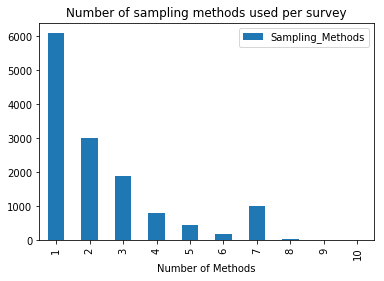

In [18]:
multiple_occ = pd.DataFrame([data_clean["Sampling_Methods"],data_clean["Sampling_Methods"].str.count(", ")+1]).T

multiple_occ.columns = ["Sampling_Methods","Number of Methods"]
multiple_occ.groupby(["Number of Methods"]).count().plot.bar()
plt.title("Number of sampling methods used per survey")
plt.show()



As we can see, more than half the surveys are using at least two methods. Let us check if there is a historical trend in the numbers of methods used: 

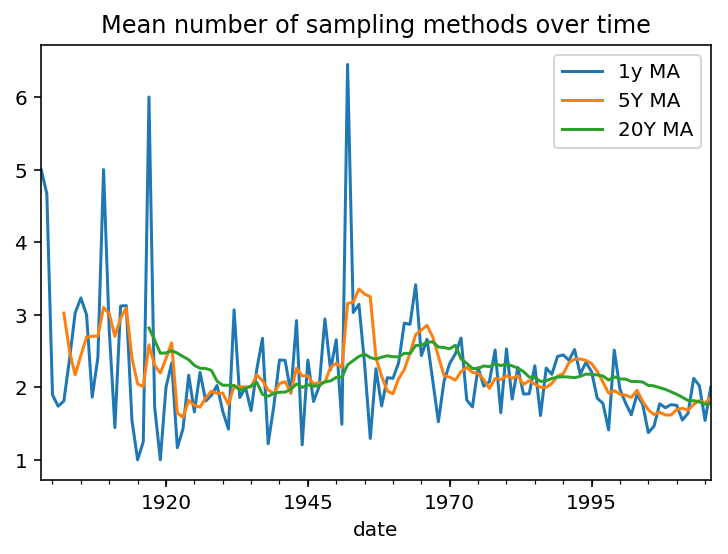

In [133]:
mean_sample = pd.DataFrame([data_clean["YeStart"],np.array([1]*len(data_clean["YeStart"])),np.array([1]*len(data_clean["YeStart"])),data_clean["Sampling_Methods"].str.count(", ")+1]).T

#adding a datetime index to use rolling from pandas
mean_sample.columns = ["year","month","day","count"]
mean_sample["date"] = pd.to_datetime(mean_sample[["year","month","day"]])
mean_sample = mean_sample.drop(["year","month","day"],axis=1)

#comuting rolling avergages
m0 = mean_sample.groupby("date").mean().rolling(window = 1).mean()
m5 = mean_sample.groupby("date").mean().rolling(window = 5).mean()
m20 = mean_sample.groupby("date").mean().rolling(window = 20).mean()

out = pd.concat([m0,m5,m20],axis=1)
out.columns = ["1y MA","5Y MA","20Y MA"]
out.plot()
plt.title("Mean number of sampling methods over time")
plt.show()

We see some irregularities at year level. 

Smoothing them out using moving averages, we can see that the number of sampling methods used in a single survey was high at the beginning of the century, decreased between world wars, increased again in the sixties and is decreasing ever since 

##### Focus on species indentification

Let us see now how species have been identified. As a reminder, the list of abreviations: 

<table class="tableizer-table">
<thead><tr class="tableizer-firstrow"><th>Species ID method</th><th>Description</th></tr></thead><tbody>
 <tr><td>CBS</td><td>Chromosone Banding </td></tr>
 <tr><td>DNA</td><td>Sequencing DNA probes</td></tr>
 <tr><td>M </td><td>Morphology</td></tr>
 <tr><td>PCR</td><td>Polymerase Chain Reaction</td></tr>
</tbody></table>

We have only four methods, but a combination of methods can be used: 

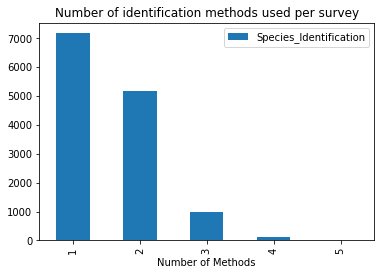

In [19]:
multiple_id = pd.DataFrame([data_clean["Species_Identification"],data_clean["Species_Identification"].str.count(", ")+1]).T

multiple_id.columns = ["Species_Identification","Number of Methods"]
multiple_id.groupby(["Number of Methods"]).count().plot.bar()
plt.title("Number of identification methods used per survey")
plt.show()

Again, roughly half the surveys have at least two id methods. 

Does this change over time ?

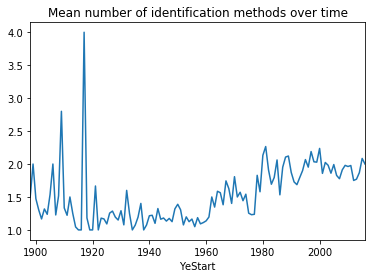

In [20]:
mean_id = pd.DataFrame([data_clean["YeStart"],data_clean["Species_Identification"].str.count(", ")+1]).T
mean_id.columns = ["YeStart","Number of Methods"]
mean_id.groupby(["YeStart"])["Number of Methods"].mean().plot()
plt.title("Mean number of identification methods over time")
plt.show()


We see a slight positive trend from 1 to 2 identification methods between 1960 and 2000. Between 1900 and 1930, there is quite a high volatility in the number of methods used. The value in 1918 is surprising as DNA sequencing was not available at this point (starts in the 80s as we can see on the graph)

**Further inspection on these surprising data points**

In [21]:
early_dna  = pd.DataFrame([data_clean["YeStart"],data_clean["Species_Identification"],data_clean["Species_Identification"].str.count(", ")+1,data_raw["Source_Title"]]).T
early_dna.columns= ["YeStart","Species_Identification","Count","Source_Title"]
early_dna[(early_dna["Species_Identification"].str.contains("DNA")) & (early_dna["YeStart"]<1950)].sort_values("YeStart")


YeStart                             Species_Identification Count  \
10497    1899                                        M, DNA, PCR     3   
5829     1900                                        M, DNA, PCR     3   
4871     1900                                        M, DNA, PCR     3   
5012     1900                                        M, DNA, PCR     3   
5747     1900                                        M, DNA, PCR     3   
4694     1901                                        M, DNA, PCR     3   
3442     1903                                        M, DNA, PCR     3   
6851     1903                                   M, CBS, DNA, PCR     4   
7329     1904                                   M, CBS, DNA, PCR     4   
10178    1905                                             M, DNA     2   
468      1905                                   M, CBS, DNA, PCR     4   
6265     1907                                        M, DNA, PCR     3   
10104    1908                                        M, DNA, PCR     3   
9497     1909                          M, Cross-mating, DNA, PCR     4   
8878     1909                                        M, DNA, PCR     3   
9316     1910                                        M, DNA, PCR     3   
8054     1910                          M, PCR, DNA, Cross-mating     4   
8109     1911                                        M, DNA, PCR     3   
5205     1912                                        M, DNA, PCR     3   
5184     1912                                        M, DNA, PCR     3   
8169     1912                                        M, DNA, PCR     3   
5046     1912                                        M, DNA, PCR     3   
164      1912                                        M, DNA, PCR     3   
1722     1912                                   M, CBS, DNA, PCR     4   
2226     1912                          M, Cross-mating, DNA, PCR     4   
1990     1912                                        M, DNA, PCR     3   
10415    1912                                        M, CBS, DNA     3   
5135     1918                                        M, DNA, PCR     3   
3349     1921                                        M, DNA, PCR     3   
3593     1923                                        M, DNA, PCR     3   
...       ...                                                ...   ...   
5658     1932                                        M, DNA, PCR     3   
5533     1932                                   M, CBS, DNA, PCR     4   
12203    1936                                        M, DNA, PCR     3   
3092     1936                                        M, DNA, PCR     3   
8933     1937                                   M, DNA, CBS, PCR     4   
1754     1937                                        M, DNA, PCR     3   
8500     1937                          M, Cross-mating, DNA, PCR     4   
11696    1940                                        M, DNA, PCR     3   
60       1940                                        M, DNA, PCR     3   
5226     1940                                        M, DNA, PCR     3   
2296     1941                                        M, DNA, PCR     3   
10448    1941                                        M, DNA, PCR     3   
4325     1943                                   M, CBS, DNA, PCR     4   
6500     1943                                        M, DNA, PCR     3   
5624     1943  M, RFLP (Restriction Fragment Length Polymorph...     4   
6400     1944                                        M, DNA, PCR     3   
11564    1944                                             M, DNA     2   
13209    1944                                        M, DNA, PCR     3   
8703     1945                                        M, DNA, PCR     3   
3535     1946                                        M, DNA, PCR     3   
3208     1946                                        M, DNA, PCR     3   
643      1947                                        M, DNA, PCR     3   
642      1

There appears to be a limited number of studies mentionning DNA as a source before the 50s. 
This would be worth having a look into, and determining what exactly was ment. 

Here is the list of the studies: 

In [22]:
values_early_dna = early_dna[(early_dna["Species_Identification"].str.contains("DNA")) & (early_dna["YeStart"]<1940)].sort_values("YeStart")

values_early_dna["Source_Title"].str.slice(0,50).value_counts()

Kumm HW (1929). The geographical distribution of t    13
Symes CB (1931). Descriptions of fourth stage larv     3
Evans AM & Symes CB (1937). Anopheles funestus and     2
Le Moal (1906). Étude sur les Moustiques en Afriqu     2
Gibbins EG (1932). Natural Malaria Infection of Ho     2
Simpson JJ (1912). Entomological research in Briti     2
Ingram A & de Meillon B (1929). A mosquito survey      2
Laveran MA (1904). Anopheles et paludisme a Madaga     2
Sant'Anna JF (1920). Anofelíneos de Portugal e Col     2
Simpson JJ (1916). Entomological Research in Briti     2
Evans AM (1931). Observations made by Dr. M. A. Ba     1
Gordon RM, Hicks EP, Davey TH, Watson M (1932). A      1
Leeson HS (1937). The mosquitoes of the funestus s     1
Christophers SR & Stephens JWW (1900). Further rep     1
Masson (1930). Note sur le fonctionnement du servi     1
Gibbins EG (1933). The domestic Anopheles mosquito     1
Schwetz J, Baumann H, Fort M (1947). Nouvelles rec     1
Ingram A (1919). The domestic b

These studies would be worth looking into, in particular Kumm HW and Symes CB as they account for 16 of the occurences. 

Let us check now what method is the prefered method when only one is chosen:

In [134]:
single_id = pd.DataFrame([data_clean["Species_Identification"],data_clean["Species_Identification"].str.count(", ")+1]).T
single_id.columns = ["Species_Identification","Number of Methods"]
single_id_out = single_id[single_id["Number of Methods"] == 1]
single_id_out.groupby(["Species_Identification"]).sum()


Species_Identification Number of Methods
0                          M                 1
1                          M                 1
3                          M                 1
4                          M                 1
5                          M                 1
6                          M                 1
8                          M                 1
9                          M                 1
10                         M                 1
11                         M                 1
12                         M                 1
13                         M                 1
14                         M                 1
15                         M                 1
16                         M                 1
17                         M                 1
18                         M                 1
19                         M                 1
25                         M                 1
28                         M                 1
31                         M                 1
33                         M                 1
35                         M                 1
41                         M                 1
42                         M                 1
43                         M                 1
44                         M                 1
45                         M                 1
46                         M                 1
47                         M                 1
...                      ...               ...
13400                      M                 1
13402                      M                 1
13403                      M                 1
13404                      M                 1
13405                      M                 1
13408                      M                 1
13409                      M                 1
13411                      M                 1
13412                      M                 1
13413                      M                 1
13414                      M                 1
13418                      M                 1
13420                      M                 1
13421                      M                 1
13424                      M                 1
13428                      M                 1
13432                      M                 1
13433                      M                 1
13435                      M                 1
13445                      M                 1
13447                      M                 1
13448                      M                 1
13450                      M                 1
13451                      M                 1
13452                      M                 1
13453                      M                 1
13455                      M                 1
13457                      M                 1
13461                      M                 1
13463                      M                 1

[7176 rows x 2 columns]

Every time a single method has been used (roughly 50% of studies), it was a morphological analysis. 

As such, it is confirmed that other methods come on top to validate this morphological approach. 

Let us check the percent of single morphological studies over time: 

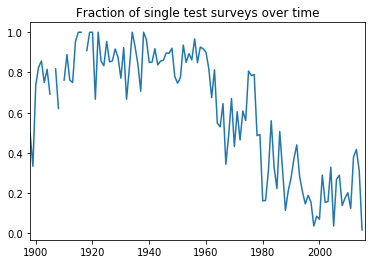

In [24]:
single_id = pd.DataFrame([data_clean["YeStart"],data_clean["Species_Identification"],data_clean["Species_Identification"].str.count(", ")+1]).T
single_id.columns = ["YeStart","Species_Identification","Number of Methods"]
single_id_out = single_id[single_id["Number of Methods"] == 1]

single_count = single_id_out.groupby(["YeStart"]).sum()["Number of Methods"]
total_count = data_clean["YeStart"].value_counts()

out = pd.concat([single_count,total_count],axis=1)
out.columns = ["single","total"]

out_p = out.single/out.total
out_p.plot()
plt.title("Fraction of single test surveys over time")
plt.show()

The trend is clearly decreasing, indicating that as time goes by, scientist have been more and more using multiple methods to identify anophenile vectore in Africa. 

Let us have a look at the geography of the identification methods, to see, again if there is a preference. 

In [25]:
M_G = data_raw[data_raw["YeStart"]>1960][["Species_Identification","Lat","Long"]]

M_G = M_G.sort_values(["Species_Identification"])
M_G_s = M_G.copy()
M_G_s.Species_Identification = M_G.Species_Identification.str.strip("M, ")

M_G_s = pd.concat([M_G_s,M_G_s.Species_Identification.str.count(", ")+1],axis=1)

M_G_s.columns = ["Id","Lat","Long","Count"]
M_G_s.Id.replace("","M",inplace=True)

M_G_plot = M_G_s[M_G_s["Count"]<2][["Id","Lat","Long"]]
M_G_plot = M_G_plot.sort_values(["Id"])
M_G_plot = M_G_plot[M_G_plot.Id.isin(M_G_plot.Id.value_counts().index[M_G_plot.Id.value_counts()>10].values)]


limits = get_lim(M_G_plot,"Id")
colors = get_N_HexCol(len(limits))
data = []
names= M_G_plot.Id.value_counts().index[M_G_plot.Id.value_counts()>10].values

for i in range(len(limits)):
    lim = limits[i]
    df_sub = AL_G[lim[0]:lim[1]]
    data.append(dict(
        type = 'scattergeo',
        locationmode = 'africa',
        lon = df_sub['Long'],
        lat = df_sub['Lat'],
        marker = dict(
            color = colors[i],
            line = dict(width=0.5, color='rgb(40,40,40)'),
            sizemode = 'area'
        ),
        name=names[i]))
    
layout = dict(
        title = 'Identification methods of anophenile vectors after 1960',
        showlegend = True,
        hovermode = False,
        geo = dict(
            scope='africa',
            projection=dict( type='africa' ),
            showland = True,
            landcolor = 'rgb(185, 185, 185)',
            subunitwidth=1,
            countrywidth=1,
            subunitcolor="rgb(200, 200, 200)",
            countrycolor="rgb(255, 255, 255)"
        ),
    )

fig = dict( data=data, layout=layout )
py.offline.iplot(fig)

This is quite interesting as it appears some methods have been used very locally, such as the XXX method. 
Other methods seem to be in use all over Africa with a small number of marginal methods (less than 10 occurences). 

#### Mosquito survey repartition by species: historical and geographical analysis

Here follows a geographical analysis of mosquito species repartition over time

##### Evolution of a particular species over time

In [26]:
mosquitos = ["An_gambiae_complex","An_paludis_","An_coustani_s_l","An_squamous","An_arabiensis","An_funestus__s_l"]
lim_dates=[1898,1930,1970,2016]
data_test = []
y_colours = ["yellow","blue","red"]

layout = dict(
    title = 'African Mosquitos surveys over time and species',
    autosize = False,
    hovermode = False,
    width = 1000,
    height = 900,
    font=dict(family='Arial', size=9),
    )

layout["geo"] = dict(
        scope='africa',
        showland = True,
        landcolor = 'rgb(217, 217, 217)',
        subunitwidth=1,
        countrywidth=1,
        subunitcolor="rgb(255, 255, 255)",
        countrycolor="rgb(255, 255, 255)",
        domain = dict( x = [], y = []))

for i in range(len(mosquitos)):
    for j in range(0,3):
        geo_key = 'geo'+str(i+1)+str(j+1)
        df = data_clean.query(str(lim_dates[j])+'<= YeStart <='+str(lim_dates[j+1]))#+" and Adults_Larvae == 'Adults, Larvae'")
        lons = list(df[df[mosquitos[i]] == 1]['Long'])
        lats = list(df[df[mosquitos[i]] == 1]['Lat'])
    
        data_test.append(
        dict(
            type = 'scattergeo',
            showlegend=False,
            lon = lons,
            lat = lats,
            geo = geo_key,
            marker = dict(
                color = y_colours[j],
                line = dict(width=0.5, color='rgb(155,187,23)'),
                sizemode = 'area'),
            name = 'Presence of'+mosquitos[i]
        )
    )
        ####plot legend
        data_test.append(
        dict(
            type = 'scattergeo',
            showlegend = False,
            lon = [15],
            lat = [30],
            geo = geo_key,
            text = [mosquitos[i]+'<br>'+str(lim_dates[j])+'-'+str(lim_dates[j+1])],
            mode = 'text',
        )
    )
       
        layout[geo_key] = dict(
        scope='africa',
        showland = True,
        landcolor = 'rgb(217, 217, 217)',
        subunitwidth=1,
        countrywidth=1,
        subunitcolor="rgb(255, 255, 255)",
        countrycolor="rgb(255, 255, 255)",
        domain = dict( x = [], y = []),
    )

z = 0
COLS = 3
ROWS = 6
for y in reversed(range(ROWS)):
    for x in range(COLS):
        geo_key = 'geo'+str(ROWS-y)+str(x+1)
        layout[geo_key]['domain']['x'] = [float(x)/float(COLS), float(x+1)/float(COLS)]
        layout[geo_key]['domain']['y'] = [float(y)/float(ROWS), float(y+1)/float(ROWS)]
        z=z+1
        if z > 20:
            break

fig = {'data':data_test, 'layout':layout}

py.offline.iplot(fig, filename='Mosquitos')

In [27]:

i=0
sl_dates = list(range(1900,2011,10)) + [2016]
colors = get_N_HexCol(len(mosquitos))
data = []

for j in range(len(sl_dates)-1):
    df = data_clean.query(str(sl_dates[j])+'<= YeStart <='+str(sl_dates[j+1]))
    df = df[df[mosquitos[i]] == 1]
    df['text'] = df['Country'] + '<br>Year ' + (df['YeStart']).astype(str)    
    
    data.append(dict(
        type = 'scattergeo',
        visible = False,
        locationmode = 'africa',
        lon = df['Long'],
        lat = df['Lat'],
        text = df['text'],
        geo = 'geo',
        marker = dict(
            color = colors[i],
            line = dict(width=0.5, color='rgb(155,187,23)'),
            sizemode = 'area'
            ),
        name = 'Presence of '+mosquitos[i]+' '+str(sl_dates[j])+'-'+str(sl_dates[j+1])))    
steps = []
for k in range(len(data)):
    step = dict(
        method = 'restyle',
        args = ['visible', [False] * len(data)],
    )
    step['args'][1][k] = True # Toggle i'th trace to "visible"
    steps.append(step)
    
sliders = [dict(
    active = 0,
    currentvalue = {"prefix": "Period: "},
    pad = {"t": len(sl_dates)-1},
    steps = steps
)]

layout = dict(
        title = mosquitos[i]+' presence in surveys over time',
        showlegend = True,
        xaxis = dict(fixedrange=True),
        geo = dict(
            scope='africa',
            showland = True,
            landcolor = 'rgb(217, 217, 217)',
            subunitwidth=1,
            countrywidth=1,
            subunitcolor="rgb(255, 255, 255)",
            countrycolor="rgb(255, 255, 255)"
        ),
        sliders=sliders
    )

fig = dict(data=data, layout=layout)
py.offline.iplot(fig, filename='Slider')


#### Data inspection tools

As a second step we will write some tools (functions), that will allow us to inspect parts of the data, in particular to extract records of the dataset and to present them in a new and interesting fashion

- function to get all the mosquitos associated to a country and a time frame
- function to get all the records near a given point of interest 
- function to XXX

In [28]:
from geopy.geocoders import Nominatim

def get_coord(x):
    if not isinstance(x,str):
         raise ValueError("Not a String")
    geolocator = Nominatim()
    if geolocator.geocode(x) == None:
        raise ValueError("Input not recognized")
    location = geolocator.geocode(x)
    return((location.latitude, location.longitude))

def geo_africa_check(coord):
    lat = coord[0]
    long = coord[1]
    return -36 < lat < 36 , -26 < long < 54
    
#https://stackoverflow.com/questions/4913349/haversine-formula-in-python-bearing-and-distance-between-two-gps-points
#formula to calculate distance between two points (km)

def haversine(lat1, lon1, lat2, lon2):
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return np.multiply(c,r)


In [29]:
import warnings
def observations_near(x,km=500):    
    #coordinates exist :
    try:
        if geo_africa_check(get_coord(x)) != (True,True):
            warnings.warn("Specified place out of range: not in target African zone!")
    except:
        raise ValueError("Entered place does not exist, check spelling / existence")
    #check distance
    if not (isinstance(km,int) or isinstance(km,float)):
        raise ValueError("Please enter distance as integer or float")

    #create arrays of coordinated of point of interst 
    p_lat = np.array([get_coord(x)[0]]*len(data_clean["Lat"]))
    p_lon = np.array([get_coord(x)[1]]*len(data_clean["Long"]))
    
    #compute distance and return points with distance less than specified km
    return(data_clean[(haversine(p_lat,p_lon,data_clean["Lat"],data_clean["Long"])<km)])



In [34]:
def plot_observations_near(x,km=500,segmentation="None"):
    try: 
        inp=observations_near(x,km)
    except: 
        raise ValueError("Check Inputs")
    if segmentation not in list(inp)+["None"]:
        raise ValueError("desired segmentation not available, please choose from: "+str(list(df)))
    if inp.empty:
        raise ValueError("No data in requested zone")
    if segmentation == "None":
        limits = [(0,len(inp["Lat"]))]
        names = ["All records"]
    else:
        inp = inp.sort_values(segmentation)
        limits = get_lim(inp,segmentation)
        names = inp[segmentation].value_counts().index

    colors = get_N_HexCol(len(limits))
    data = []
    
    for i in range(len(limits)):
        lim = limits[i]
        df_sub = inp[lim[0]:lim[1]]
        data.append(dict(
            type = 'scattergeo',
            locationmode = 'africa',
            lon = df_sub['Long'],
            lat = df_sub['Lat'],
            geo = 'geo',
            marker = dict(
                color = colors[i],
                line = dict(width=0.5, color='rgb(40,40,40)'),
                sizemode = 'area'),
            name=names[i])
                   )
    
    layout = dict(
        title = 'Plot of observation less than '+str(km)+' km from '+str(x),
        showlegend = True,
        hovermode = False,
        geo = dict(
            scope='africa',
            projection=dict( type='africa' ),
            showland = True,
            landcolor = 'rgb(185, 185, 185)',
            subunitwidth=1,
            countrywidth=1,
            subunitcolor="rgb(200, 200, 200)",
            countrycolor="rgb(255, 255, 255)"
            ),
        )

    fig = dict( data=data, layout=layout)
    py.offline.iplot(fig)

In [31]:
print("ano: ",ano)
print("")
print("mosquitos:",mosquitos)
data_clean[["Country"] + ano].groupby('Country').sum()[mosquitos[0]].sort_values(ascending=False).head(10)

ano:  ['An_gambiae_complex', 'An_gambiae_ss', 'SS_M_Form_(An_colluzzi_or_Mopti_forms)', 'SS_S_Form_(savanah_or_Bamako_forms)', 'An_arabiensis', 'An__melas', 'An__merus', 'An_bwambae', 'An_funestus__s_l', 'An_funestus_s_s__(specified)', 'An_rivulorum', 'An_leesoni', 'An_parensis', 'An_vaneedeni', 'An_nili_s_l', 'An_moucheti_s_l', 'An_pharoensis', 'An_hancocki', 'An_mascarensis', 'An_marshalli', 'An_squamous', 'An_wellcomei', 'An_rufipes', 'An_coustani_s_l', 'An_ziemanni_', 'An_paludis_']

mosquitos: ['An_gambiae_complex', 'An_paludis_', 'An_coustani_s_l', 'An_squamous', 'An_arabiensis', 'An_funestus__s_l']


Country
Madagascar                          1102.0
Kenya                                968.0
Cameroon                             784.0
Ethiopia                             570.0
Burkina Faso                         530.0
Tanzania                             510.0
Senegal                              499.0
Democratic Republic of the Congo     447.0
Sudan                                444.0
Somalia                              426.0
Name: An_gambiae_complex, dtype: float64

In [36]:
plot_observations_near("Nairobi",500,"Country")